# EDA

In [1]:
import pandas as pd

In [5]:
ratings = pd.read_csv(
    "/kaggle/input/movielens-1m-dataset/ratings.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    header=None,
    names=["UserID", "MovieID", "Rating", "Timestamp"]
)

<Axes: ylabel='Frequency'>

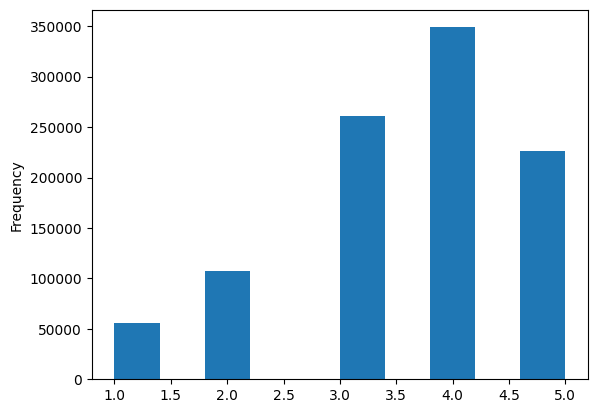

In [6]:
ratings["Rating"].plot.hist()

In [7]:
ratings["UserID"].value_counts()

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
2530      20
3407      20
2884      20
1493      20
4463      20
Name: count, Length: 6040, dtype: int64

In [8]:
ratings["MovieID"].value_counts()

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
584        1
1820       1
701        1
2214       1
763        1
Name: count, Length: 3706, dtype: int64

In [21]:
top5 = (
    ratings["MovieID"]
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={"index": "MovieID", "count": "NumRatings"})
    .merge(movies, on="MovieID")
    [["MovieID", "Title", "NumRatings"]]
)

top5


,MovieID,Title,NumRatings
0,2858,American Beauty (1999),3428
1,260,Star Wars: Episode IV - A New Hope (1977),2991
2,1196,Star Wars: Episode V - The Empire Strikes Back...,2990
3,1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
4,480,Jurassic Park (1993),2672


In [10]:
users = pd.read_csv(
    "/kaggle/input/movielens-1m-dataset/users.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    header=None,
    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"]
)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


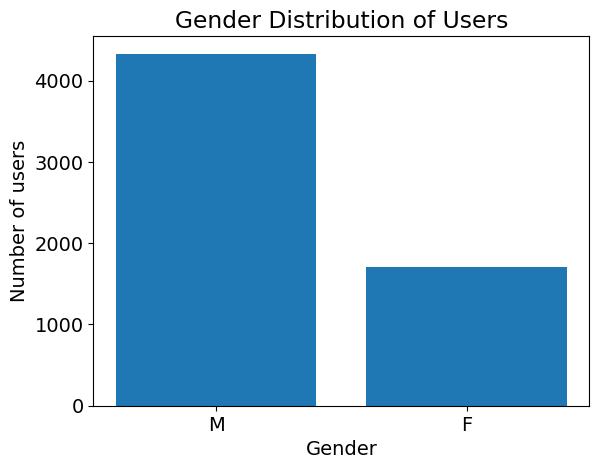

In [27]:
import matplotlib.pyplot as plt

# Count gender distribution
gender_counts = users["Gender"].value_counts()

# Plot
plt.figure()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Number of users")
plt.title("Gender Distribution of Users")
plt.show()


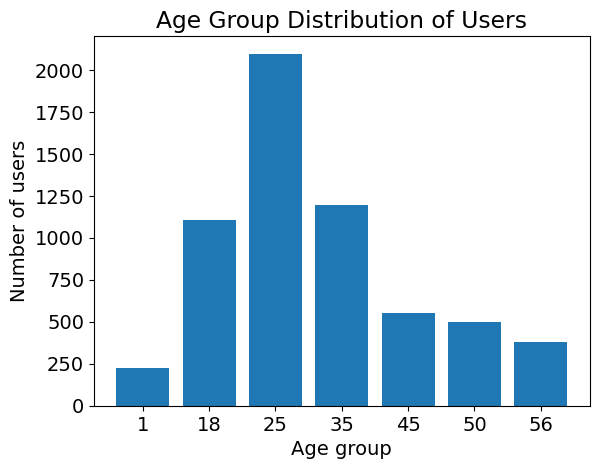

In [26]:
age_counts = users["Age"].value_counts().sort_index()

plt.figure()
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.xlabel("Age group")
plt.ylabel("Number of users")
plt.title("Age Group Distribution of Users")
plt.show()


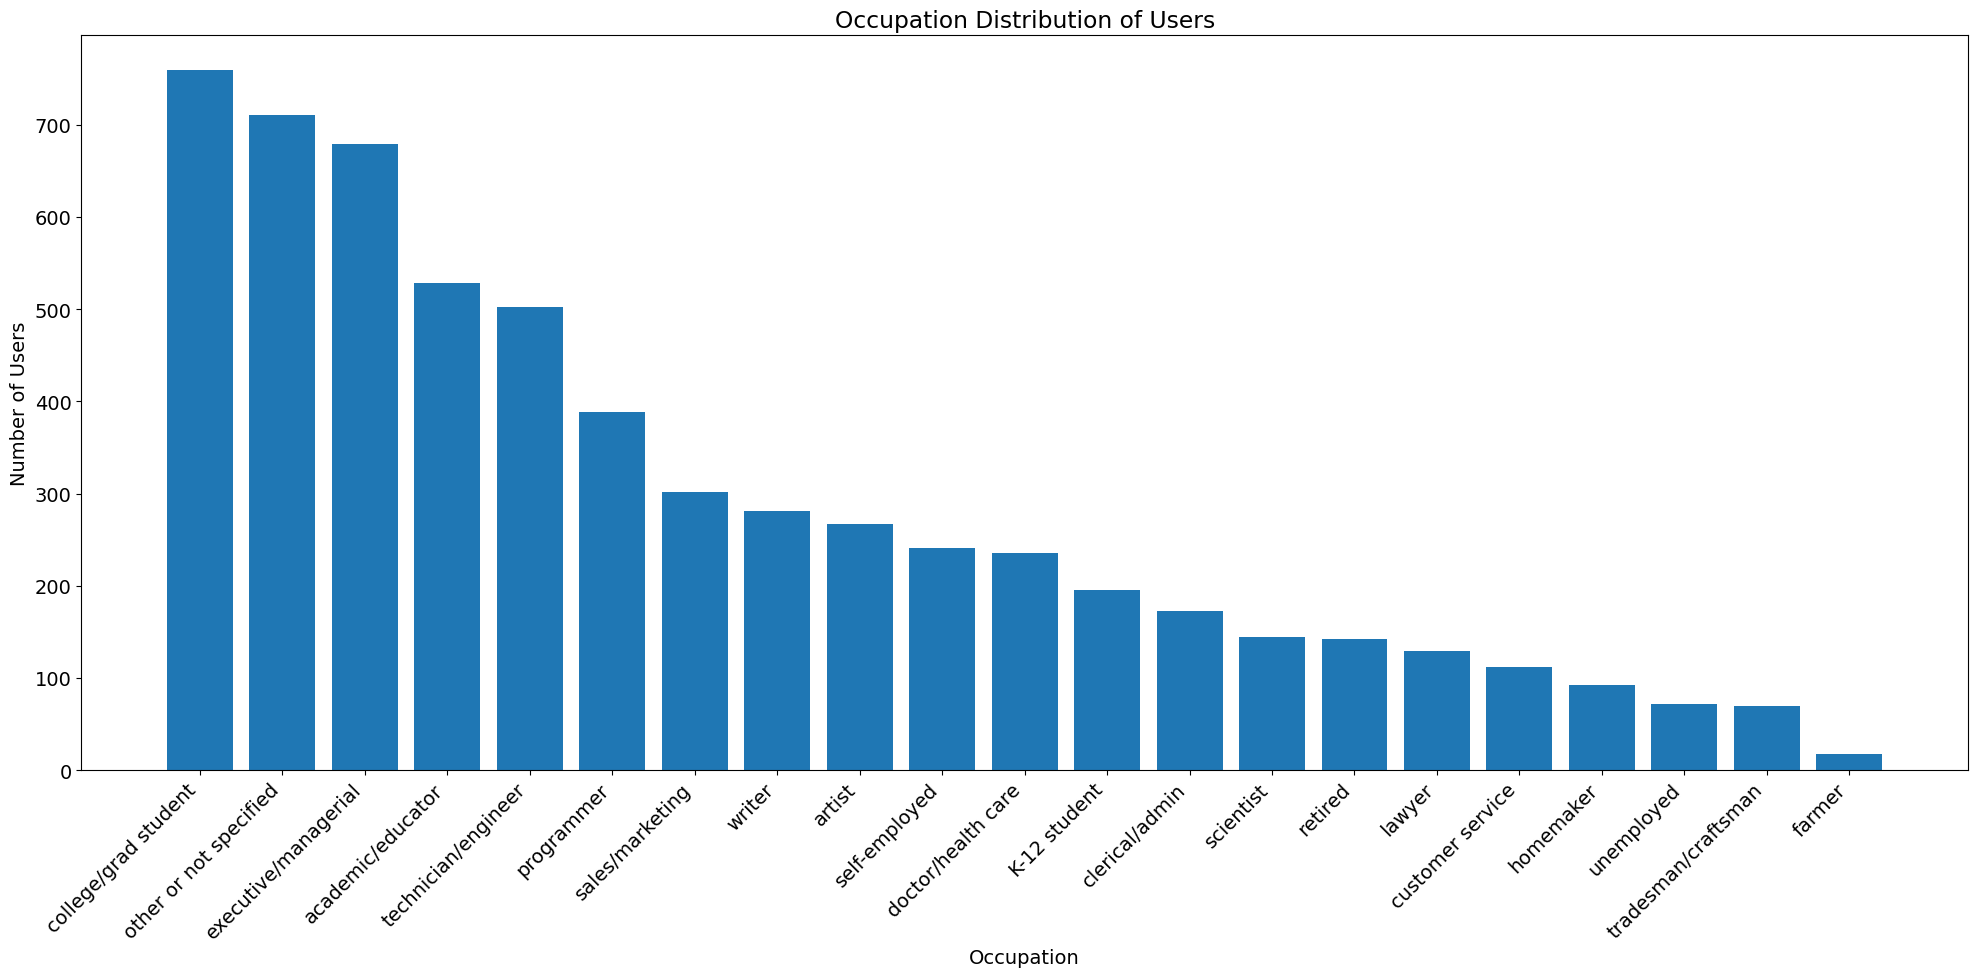

In [28]:
import matplotlib
from matplotlib import pyplot as plt

occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

occupation_id_count = users["Occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}

matplotlib.rcParams.update({"font.size": 14})
plt.figure(figsize=(20, 10))
plt.bar(occupation_count.keys(), occupation_count.values())

plt.xticks(rotation=45, ha="right")

plt.xlabel("Occupation")
plt.ylabel("Number of Users")
plt.title("Occupation Distribution of Users")
plt.tight_layout()
plt.show()


In [16]:
movies = pd.read_csv(
    "/kaggle/input/movielens-1m-dataset/movies.dat",
    sep="::",
    engine="python",      # REQUIRED for multi-char separator
    encoding="latin-1",   # FIXES UnicodeDecodeError
    header=None,
    names=["MovieID", "Title", "Genres"]
)

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [17]:
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [18]:
movies["num_genres"] = movies["Genres"].apply(lambda x: len(x.split('|')))
movies["num_genres"].value_counts()

num_genres
1    2025
2    1322
3     421
4     100
5      14
6       1
Name: count, dtype: int64

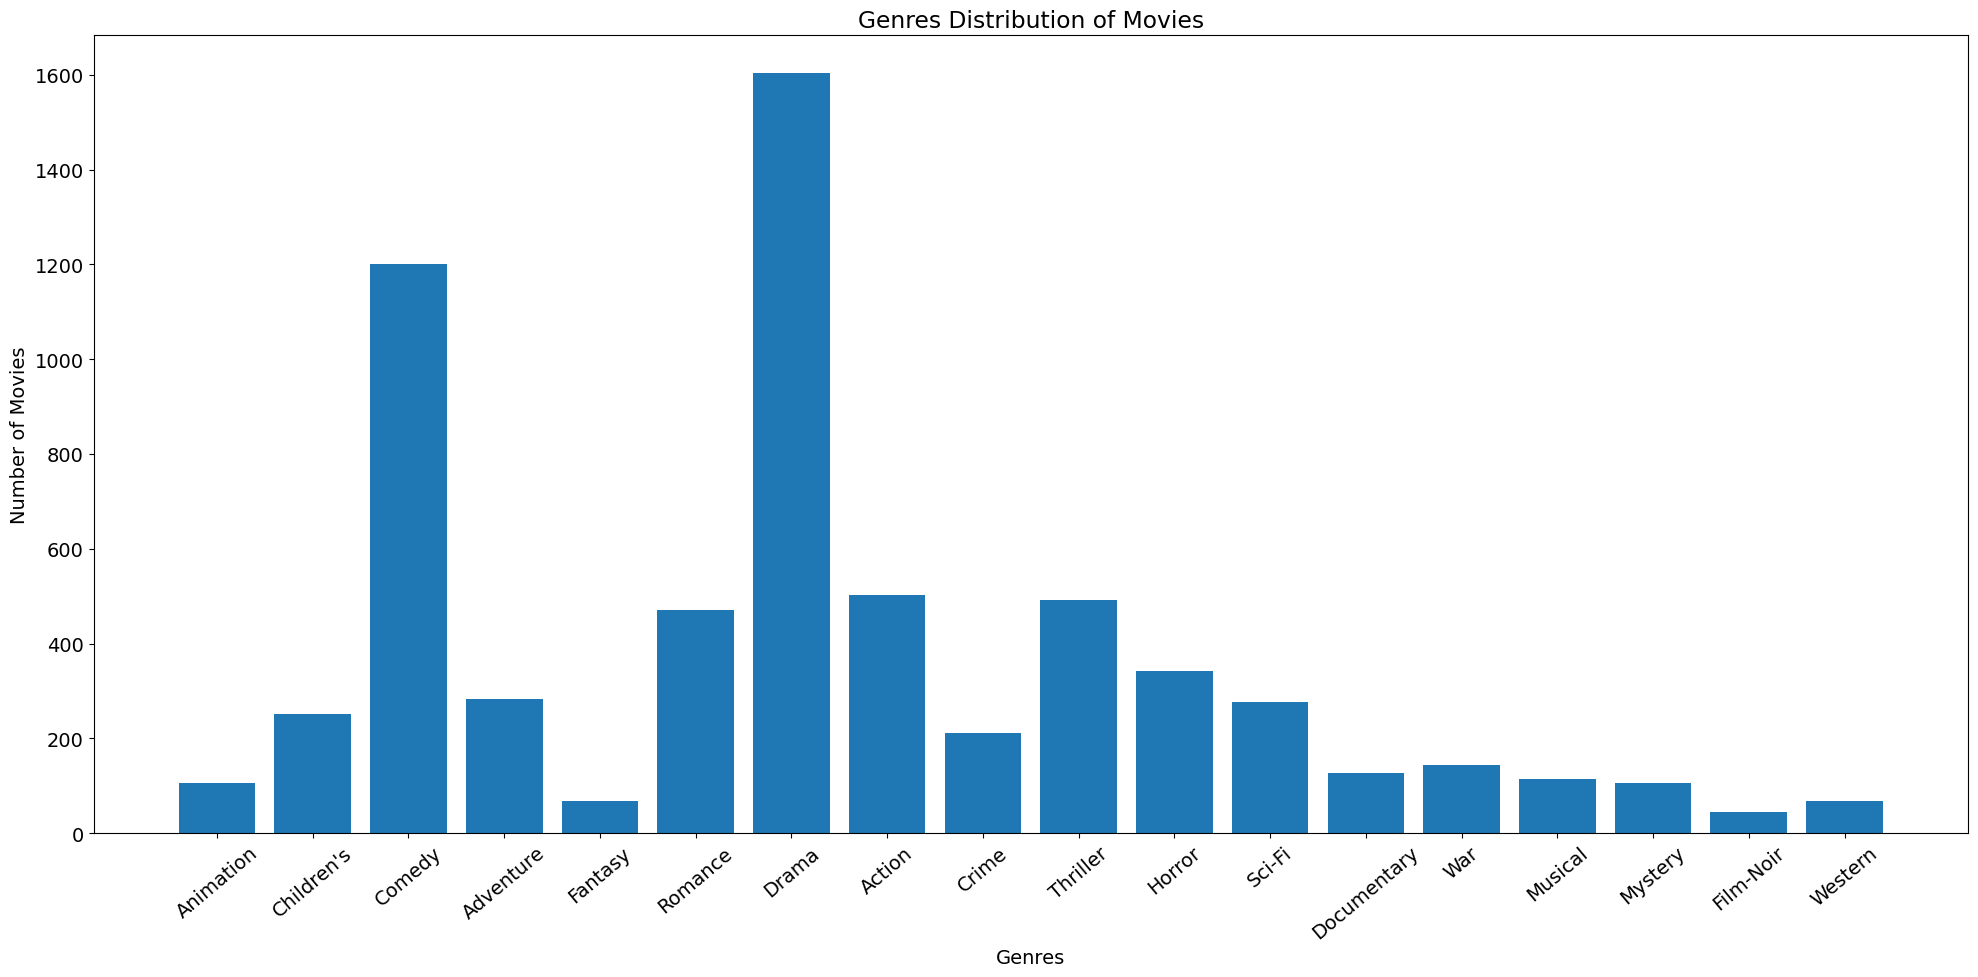

In [36]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies["Genres"]:
    genres = genre_str.split('|')
    for genre in genres:
        genres_counter[genre] += 1
        
plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=40)

plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Genres Distribution of Movies")
plt.tight_layout()
plt.show()
